In [1]:
import sys
import pickle
import matplotlib.pyplot as plt
import PyHEADTAIL

sys.path.append('../../utils')
from coordinatesConversions import *

from cmpt_TuneSpreads import *

PyHEADTAIL v1.13.5




In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (8, 7),
          'axes.labelsize': 25,
          'axes.titlesize': 21,
          'xtick.labelsize': 23,
          'ytick.labelsize': 23,
          'image.cmap': 'jet',
          'lines.linewidth': 2,
          'lines.markersize': 7,
          'font.family': 'sans-serif'}


plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)
plt.close('all')

### Machine parameters, needed for the post process analysis

In [3]:
macroparticlenumber = int(5e5)
n_segments =2
alpha_x = 0 * np.ones(n_segments)  
beta_x = 30.31164764 * np.ones(n_segments)
alpha_y = 0 * np.ones(n_segments)  
beta_y = 73.81671646 * np.ones(n_segments)

In [4]:
# detuning coefficients in (1/m)
app_x = 0.0#153.8183853  #2.4705e-15 #4e-11
app_xy = 0.0#-416.0175086  #-0*2.25e-11
app_y = -6000#-50.03699877 #-7.31-14 #0*3e-11

### Coherent tune shift 

From the motion of the centroid using NAFFlib.
Initial offset in x and y 1e-4

In [5]:
coherent_tunes = pickle.load(open('coherent_Qx_Qy_6D_offsetxy1e-4.pickle', 'rb'))
Qy_coherent_wakes = coherent_tunes['Qy'][f'ayy{app_y}']

### Load the tunes for each particle as obtained from tracking

In [6]:
#path2data = f'/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/incoherent_tune_shiftQpxQpy0axyaxx0ayy{app_y}/'
path2data='./tune_pickle_data/'
study_suffix=f'6D_axx0axy0ayy{app_y}_QpxQpy0'

In [8]:
Qy_incoherent_wakes = pickle.load(open(path2data+f'Qy_file{app_y}.pkl', 'rb'))
#Qy_incoherent_wakes = pickle.load(open(path2data+f'Qy_file.pkl', 'rb'))

### Plot an 1D histogram with Qy values

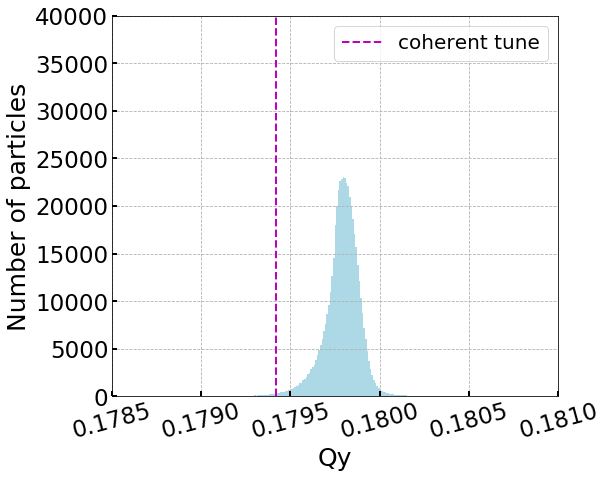

In [9]:
fig, ax = plt.subplots()
bins = 500

h = ax.hist(Qy_incoherent_wakes, bins=bins, color='lightblue')#, cmin=cmin, cmap='Blues', vmin=vmin, vmax=vmax)#cmin=cmin, vmin=100)#, cmax=40000)


#ax.scatter(Qx_coherent_wakes, Qy_coherent_wakes, c='m', zorder=50, label='coherent tune, wakes ON')
ax.vlines(Qy_coherent_wakes, 0, 40000, color='m', linestyle='dashed', label='coherent tune')

ax.set_xlabel('Qy')
ax.set_ylabel('Number of particles')


plt.xticks(rotation=15)

ax.tick_params(axis='both', which='both', direction='in', length=5, width=2)
ax.set_xlim(0.1785, 0.181)
ax.set_ylim(0, 40000) #33000


ax.grid(linestyle='dashed')
ax.legend()


savefig = True
if savefig:
    plt.savefig(f'SPS_coherent_incoherentTuneShift_1DHist_bins{bins}_{study_suffix}.png', bbox_inches='tight')